# Desafío - Naive Bayes

* En base a esta información, se les pide un modelo generativo que pueda predecirel género de una canción a partir de la letra de una canción.
* Existen 4 génerosqueseregistranenlabasededatos,porloqueparaestaactividad trabajaremos con un Multinomial Naive Bayes.

### Ejercicio 1: Preparar el ambiente de trabajo

* Importe los módulos numpy, pandas, matplotlib, seaborn, glob y os siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta dump.

In [1]:
## Basicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import glob, os

* Para ello genere un objeto que guarde en una lista todos los archivos alojados en dump utilizando glob.glob y os.getcwd() para extraer las rutas absolutas. Posteriormente genere un objeto pd.DataFrame que contenga todos los csv.
* Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto.

In [2]:
file_list = glob.glob(os.getcwd()+'/dump/*.csv')
# contiene la ruta de todos los csv

In [3]:
append_csv = []
for ruta in file_list:
    append_csv.append(pd.read_csv(ruta,
         index_col=None,header=0).drop(columns='Unnamed: 0'))

In [4]:
append_csv[0]

,0,1,2,3
0,SIA,pop,Don't Get Me Started,Don't want to be another craze \n How about ra...
1,SIA,pop,I Don't Want To Want You,I like to take you \n Only 'cause I choose \n ...
2,SIA,pop,Onlysee,"You, and you alone \n You, and you alone \n Ha..."
3,SIA,pop,Stories,How can I climb inside you \n The way that you...
4,SIA,pop,Madlove,Your insensitivity is your personality \n A tr...
...,...,...,...,...
106,SIA,pop,Sunshine,My sweet I know that you feel weak \n My sweet...
107,SIA,pop,Underneath The Mistletoe,I've got a crush lalalalalala \n Like a school...
108,SIA,pop,Everyday Is Christmas,Old father time \n You and me and holiday wine...
109,SIA,pop,Underneath The Christmas Lights,Will the snow fall for me Christmas night \n F...


In [5]:
df_lyrics = pd.concat(append_csv)
df_lyrics.columns = ['Artist', 'Genre', 'Song', 'Lyrics']

In [6]:
df_lyrics

,Artist,Genre,Song,Lyrics
0,SIA,pop,Don't Get Me Started,Don't want to be another craze \n How about ra...
1,SIA,pop,I Don't Want To Want You,I like to take you \n Only 'cause I choose \n ...
2,SIA,pop,Onlysee,"You, and you alone \n You, and you alone \n Ha..."
3,SIA,pop,Stories,How can I climb inside you \n The way that you...
4,SIA,pop,Madlove,Your insensitivity is your personality \n A tr...
...,...,...,...,...
268,Kanye West,hiphop,Wouldn't You Like To,"You like to ride, uh \n So why don't you and y..."
269,Kanye West,hiphop,Wow,"I go to Jacob wit 25 thou, you go wit 25 hundr..."
270,Kanye West,hiphop,Ye Vs. The People,I had for us \n You turned my dreams into dust...
271,Kanye West,hiphop,You Know,You know \n Oh you know \n I just want you to ...


In [7]:
df_lyrics.describe()

,Artist,Genre,Song,Lyrics
count,9489,9489,9489,9489
unique,61,4,9083,9145
top,Eminem,rock,Intro,"Unfortunately, we are not licensed to display ..."
freq,493,4140,6,283


### Ejercicio 2: Descripcion de los datos

* Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman la siguiente información:
    - La cantidad de canciones registradas por cada artista, ordenados de mayor a menor.
    - La cantidad de canciones registradas en cada género, ordenados de mayor a menor.

In [8]:
df_lyrics.shape

(9489, 4)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

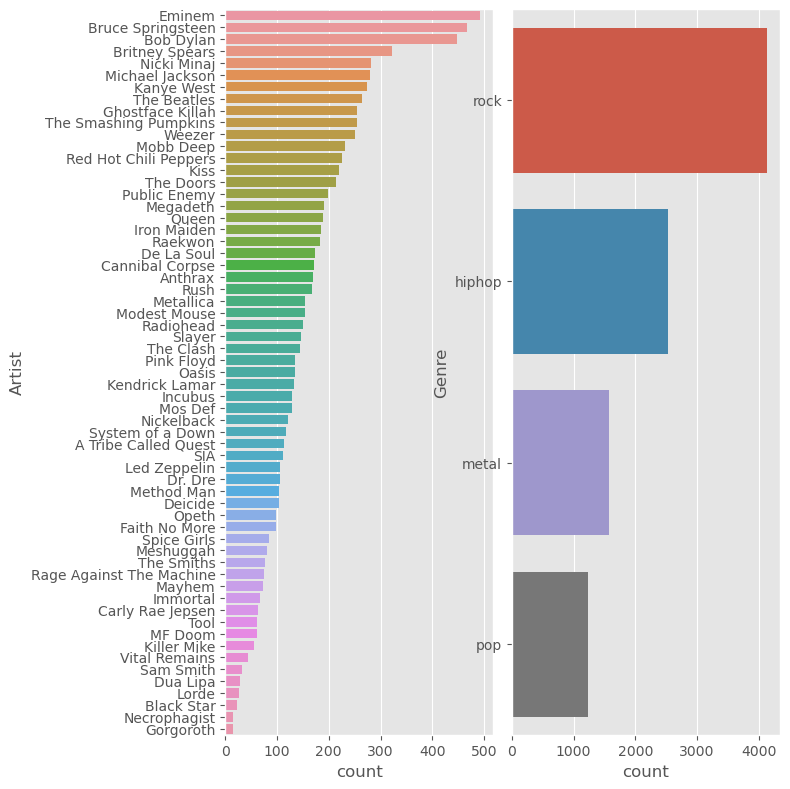

In [9]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.countplot(y=df_lyrics['Artist'],
         order=df_lyrics['Artist'].value_counts().index)
plt.tight_layout()
plt.subplot(1,2,2)
sns.countplot(y=df_lyrics['Genre'],
     order=df_lyrics['Genre'].value_counts().index)
plt.tight_layout

* La mayor concentracion de datos se encuentra en el genero Rock.
* La menor concentracion de datos, siendo menos de la mitad cada uno esta en metal y pop.
* En cuanto a los artistas se encuentran desbalanceadas las cantidades de canciones por artistas.

### Ejercicio 3: Matriz de ocurrencias

### Tokenizacion de textos

* Importe la clase CountVectorizer dentro de los módulos
feature_extraction.text de la librería sklearn. Lea la documentación asociada
a ésta. ¿Cuál es el objetivo de esta clase?

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv = CountVectorizer(stop_words='english') # stop words son conectores
cv_fit=cv.fit_transform(df_lyrics['Lyrics'])

In [12]:
words = cv.get_feature_names()

/home/diego/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
len(words)

49019

In [14]:
words[1000:1010]

['advantages',
 'advent',
 'adventure',
 'adventures',
 'adventurous',
 'adverb',
 'adverbs',
 'adversa',
 'adversaries',
 'adversary']

* La funcion CountVectorizer, convierte un conjunto de documentos de texto a una matriz de tokens de palabras, este se entrena con nuestra columna Lyrics para separar todas las palabras unicas
* El atributo stop_words filtra los conectores en el idioma seleccionado.

* Aplique la clase para extraer las 100 palabras más repetidas en toda la base de
datos

In [15]:
words = cv.get_feature_names()
word_frequency = cv_fit.toarray().sum(axis=0)
words_freq_df= pd.DataFrame([list(words), list(word_frequency)]).T

In [16]:
words_freq_df

,0,1
0,00,14
1,000,42
2,007,2
3,01,13
4,019,3
...,...,...
49014,ölén,1
49015,ömhetens,2
49016,ødeleggelse,2
49017,úgy,1


In [17]:
words_freq_df.columns = ['words', 'freq']

In [18]:
words_freq_df

,words,freq
0,00,14
1,000,42
2,007,2
3,01,13
4,019,3
...,...,...
49014,ölén,1
49015,ömhetens,2
49016,ødeleggelse,2
49017,úgy,1


In [19]:
words_freq_df2 = words_freq_df.sort_values(by='freq',
                 ascending=False).iloc[0:100, :]
words_freq_df2

,words,freq
24950,like,19629
12859,don,17398
23856,know,14962
18439,got,14171
23287,just,13978
...,...,...
11041,death,1897
24615,left,1895
43442,thing,1882
14305,end,1829


<BarContainer object of 100 artists>

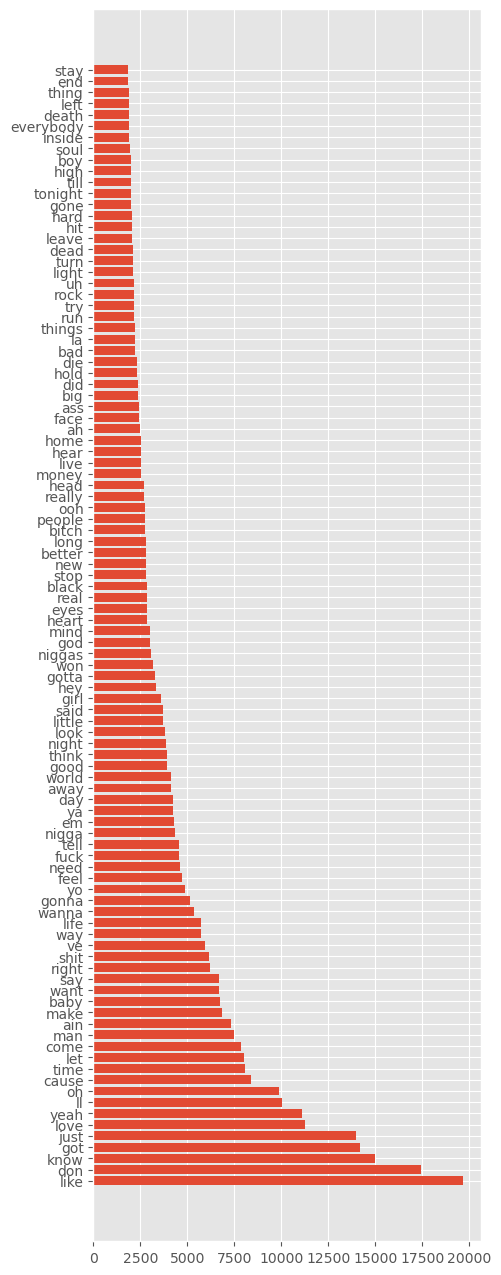

In [20]:
plt.figure(figsize=(5,16))
plt.barh(words_freq_df2['words'], words_freq_df2['freq'])

* Genere una función que replique el procedimiento para cada uno de los géneros

In [21]:
def word_count_by_genre(vectorizer=CountVectorizer(stop_words='english',ngram_range=(1,2)),
                        df=df_lyrics, target='Lyrics',
                          genre='hiphop',sort_n=100):
    tmp_vect = vectorizer
    tmp_fit_transform = tmp_vect.fit_transform(df[df['Genre']== genre][target])
    tmp_words = tmp_vect.get_feature_names()
    tmp_frequencies = tmp_fit_transform.toarray().sum(axis=0)
    tmp_df = pd.DataFrame([list(tmp_words), list(tmp_frequencies)]).T
    tmp_df.columns = ['words', 'freq']
    tmp_df = tmp_df.sort_values(by='freq', ascending=False).iloc[0:sort_n, :]
    plt.barh(tmp_df['words'], tmp_df['freq'])

/home/diego/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/diego/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/diego/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/diego/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature

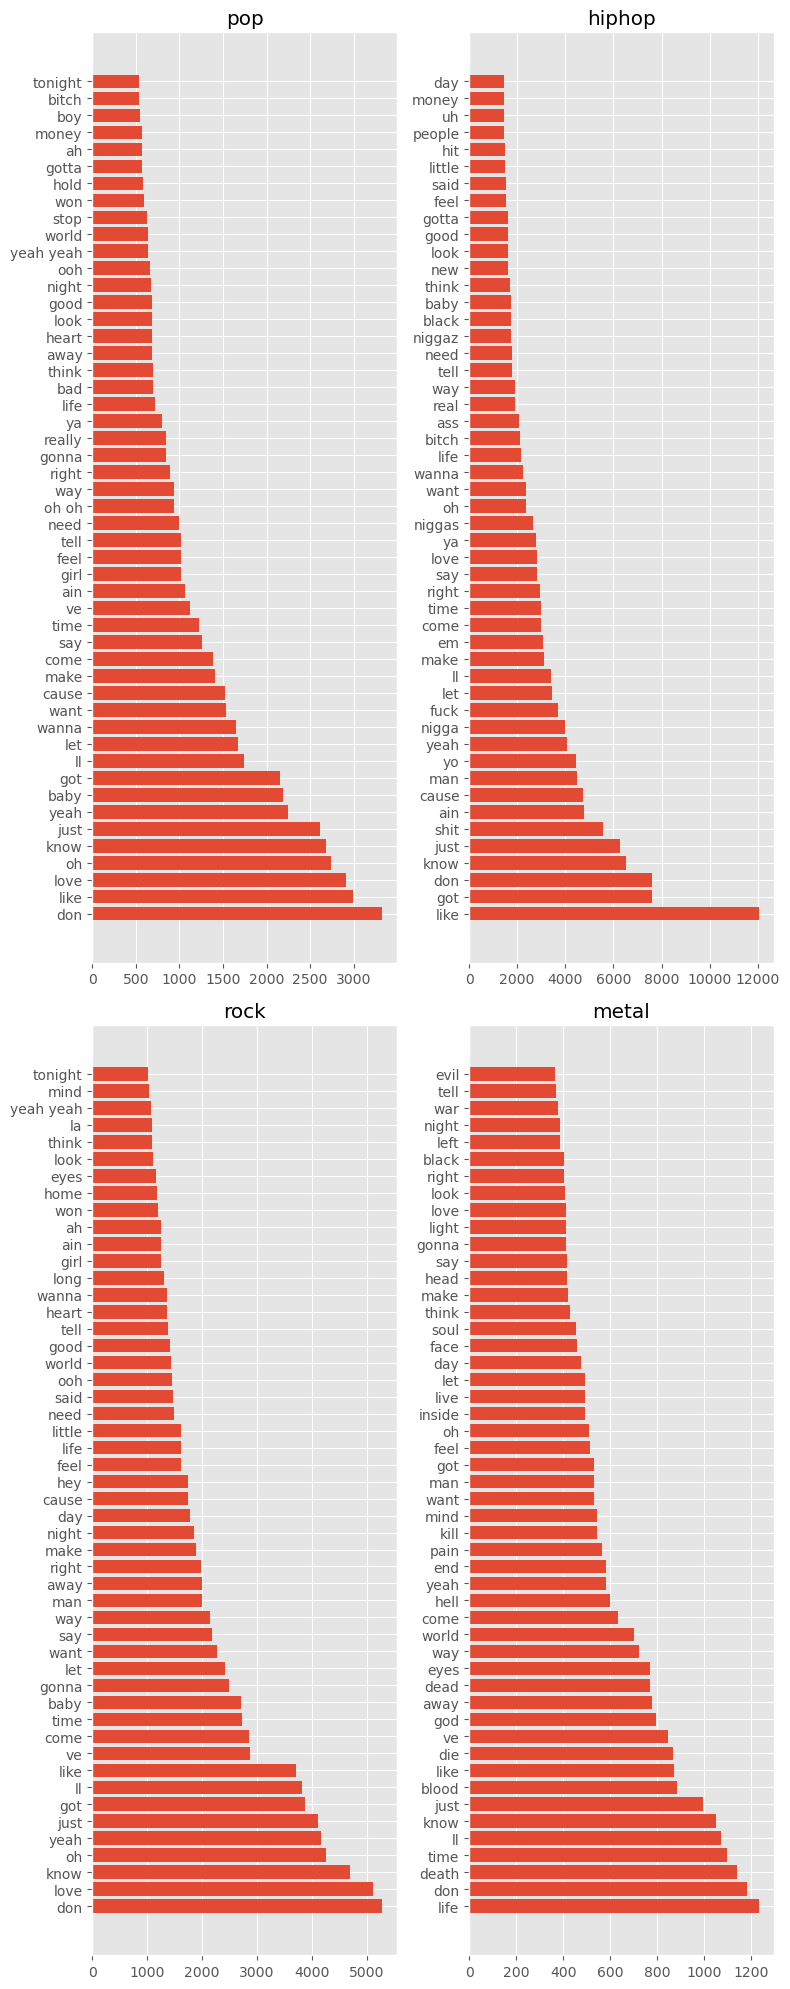

In [22]:
plt.figure(figsize=(8,20))
for index, gen in enumerate(df_lyrics['Genre'].unique()):
    plt.subplot(2,2,index+1)
    word_count_by_genre(genre=gen, sort_n=50)
    plt.title(gen)
    plt.tight_layout()

* Comente sobre las principales características de cada género en cuanto a sus
palabras.

#### Principales caracteristicas por genero
* Pop: Love, Like, Don
* HipHop: Don, got, Like
* Rock: Know, Love don
* Metal: Death, don, Life

    - Vemos que don se repite en todos los generos.
    - Like se repite en pop y hip hop, en metal y rock comparte la 9na posicion.
    - love, se encuentra en pop y rock en los demas generos no es relevante.
    - Know en todos los generos se encuentra entre los 6 mas altos.
* En resumen a modo individual no son significativas sin embargo el conjunto de posiciones relativa a la frecuencia parece ser el factor unico dentro de la clasificacion de genero.

### Ejercicio 4: Entrenamiento del modelo

#### Sklearn Pipelines

* Importe MultinomialNB, train_test_split, Pipeline, confusion_matrix y
classification_report.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

* Genere las muestras de entrenamiento y validación reservando un 40% para validación y declarando una semilla pseudoaleatoria.
* Monte el modelo dentro de un Pipeline, donde el primer paso es implementar CountVectorizer y el segundo es ejecutar el clasificadorMultinomialNB.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_lyrics['Lyrics'],
        df_lyrics['Genre'],test_size=.4,random_state=1991)
text_clf = Pipeline([('vect', CountVectorizer()), ('clf', MultinomialNB(alpha=0.1))])
text_clf.fit(X_train, y_train)
yhat= text_clf.predict(X_test)
confusion_matrix(y_test, yhat)

array([[ 930,    7,   32,   38],
       [  24,  483,   19,  120],
       [  73,    7,  240,  149],
       [  86,  109,  168, 1311]])

* A continuación se les presenta una lista de letras, ¿cuáles serían las predicciones correspondientes?

In [25]:
text_clf.predict(['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris - Move B*tch 
"Sexual violence doesn't start and end with rape It starts in our books and behind our school gates" # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to \ build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting\ You are not deserving, you are not deserving" #Banks - Drowning
])
yhat = text_clf.predict(X_test)
confusion_matrix(y_test, yhat)
print(classification_report(y_test, yhat))



              precision    recall  f1-score   support

      hiphop       0.84      0.92      0.88      1007
       metal       0.80      0.75      0.77       646
         pop       0.52      0.51      0.52       469
        rock       0.81      0.78      0.80      1674

    accuracy                           0.78      3796
   macro avg       0.74      0.74      0.74      3796
weighted avg       0.78      0.78      0.78      3796



### ¿Como mejorar el modelo?

In [26]:
from stop_words import get_stop_words

* Se agregaran las stop_words
* Se utilizaran los datos entregados en la carpeta dump plus pop

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_lyrics['Lyrics'],
        df_lyrics['Genre'],test_size=.4,random_state=1991)
text_clf = Pipeline([('vect', CountVectorizer(stop_words=get_stop_words('en'))), ('clf', MultinomialNB(alpha=0.1))])
text_clf.fit(X_train, y_train)
yhat= text_clf.predict(X_test)
confusion_matrix(y_test, yhat)

/home/diego/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


array([[ 938,    4,   27,   38],
       [  24,  483,   15,  124],
       [  67,    8,  228,  166],
       [  85,  102,  139, 1348]])

In [28]:
text_clf.predict(['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris - Move B*tch 
"Sexual violence doesn't start and end with rape It starts in our books and behind our school gates" # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to \ build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting\ You are not deserving, you are not deserving" #Banks - Drowning
])
yhat = text_clf.predict(X_test)
confusion_matrix(y_test, yhat)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

      hiphop       0.84      0.93      0.88      1007
       metal       0.81      0.75      0.78       646
         pop       0.56      0.49      0.52       469
        rock       0.80      0.81      0.80      1674

    accuracy                           0.79      3796
   macro avg       0.75      0.74      0.75      3796
weighted avg       0.78      0.79      0.79      3796



* Stop words aportan una leve mejora.

In [29]:
file_list_pop = glob.glob(os.getcwd()+'/dump_plus_pop/*.csv')

In [30]:
append_csv_pop = []
for ruta in file_list_pop:
    append_csv_pop.append(pd.read_csv(ruta,
         index_col=None,header=0).drop(columns='Unnamed: 0'))

In [31]:
df_lyrics_pop = pd.concat(append_csv_pop)
df_lyrics_pop.columns = ['Artist', 'Genre', 'Song', 'Lyrics']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

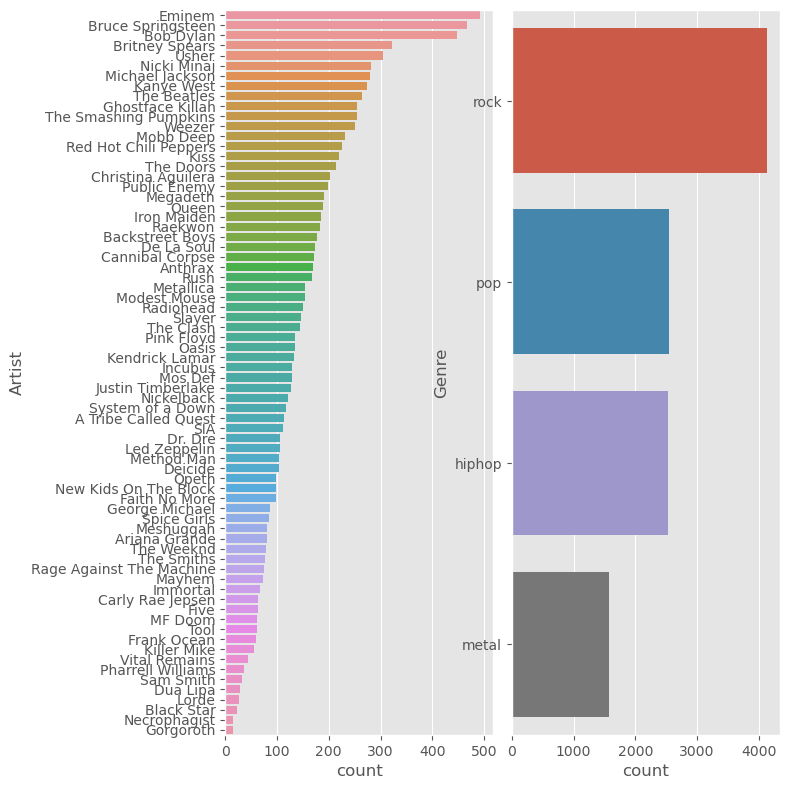

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.countplot(y=df_lyrics_pop['Artist'],
         order=df_lyrics_pop['Artist'].value_counts().index)
plt.tight_layout()
plt.subplot(1,2,2)
sns.countplot(y=df_lyrics_pop['Genre'],
     order=df_lyrics_pop['Genre'].value_counts().index)
plt.tight_layout

* Se encuentran mas datos en POP.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_lyrics_pop['Lyrics'],
        df_lyrics_pop['Genre'],test_size=.4,random_state=1991)
text_clf = Pipeline([('vect', CountVectorizer(stop_words=get_stop_words('en'))), ('clf', MultinomialNB(alpha=0.1))])
text_clf.fit(X_train, y_train)
yhat= text_clf.predict(X_test)
confusion_matrix(y_test, yhat)

/home/diego/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


array([[ 924,    3,   56,   36],
       [  22,  464,   25,  100],
       [ 112,   13,  626,  244],
       [  90,  106,  252, 1249]])

In [34]:
text_clf.predict(['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris - Move B*tch 
"Sexual violence doesn't start and end with rape It starts in our books and behind our school gates" # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to \ build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting\ You are not deserving, you are not deserving" #Banks - Drowning
])
yhat = text_clf.predict(X_test)
confusion_matrix(y_test, yhat)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

      hiphop       0.80      0.91      0.85      1019
       metal       0.79      0.76      0.78       611
         pop       0.65      0.63      0.64       995
        rock       0.77      0.74      0.75      1697

    accuracy                           0.75      4322
   macro avg       0.75      0.76      0.75      4322
weighted avg       0.75      0.75      0.75      4322



* Efectivamente aumentando la cantidad de datos recolectados, respecto al genero pop mejoro nuestro indicador para la categoria, sin embargo empeora levenemente para los otros generos, en los cuales disminuyo la muestra.